## Regresión Logística Titanic - Mercadeo Bancario

### Importar librerías y data

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split

In [3]:
data = pd.DataFrame()
data = pd.read_csv("https://raw.githubusercontent.com/luisFernandoCastellanosG/Machine_learning/master/1-Machine_Learning_Classic/Databasets/dataset_titanic_procesado.csv", encoding='utf-8')

### Conocer la data

In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [6]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
uniqueValues = data['Survived'].unique()
print(sorted(uniqueValues))

[0, 1]


### Convertir Data Categorica en Data Numerica

In [9]:
Name = {
    
    }
data['Name'] = data['Name'].map(Name)

In [10]:
Sex = {
    'male': 0,
    'female': 1
    }
data['Sex'] = data['Sex'].map(Sex)

In [11]:
Ticket = {

}
data['Ticket'] = data['Ticket'].map(Ticket)

In [12]:
Cabin = {

}
data['Cabin'] = data['Cabin'].map(Cabin)

In [13]:
Embarked = {
    'S': 0,
    'C': 1,
    'Q': 2
}
data['Embarked '] = data['Embarked '].map(Embarked )

###Convertir Data Categorica en Data Numerica V2 (usando preprocessing)

In [14]:
from sklearn import preprocessing
le =preprocessing.LabelEncoder()  #instanciamos el Codificador 

In [15]:
le.fit(data['Sex'])  #codificamos las categorias
list(le.classes_)

[0, 1]

In [16]:
le.transform(data['Sex'])   #transformamos las categorias a valores numericos


array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,

In [17]:
data['Name']=le.fit_transform(data['Name'])  # (version rapida)
data['Sex']=le.fit_transform(data['Sex'])  # (version rapida)
data['Ticket']=le.fit_transform(data['Ticket'])  # (version rapida)
data['Cabin']=le.fit_transform(data['Cabin'])  # (version rapida)
data['Embarked ']=le.fit_transform(data['Embarked '])  # (version rapida)

In [18]:
uniqueValues = data['Embarked '].unique()
print(Embarked )

{'S': 0, 'C': 1, 'Q': 2}


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int64  
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    int64  
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int64  
 11  Embarked     891 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 83.7 KB


In [20]:
data = data.fillna(0)

In [21]:
data['Age'] = data['Age'].astype('int')
data['Fare'] = data['Fare'].astype('int')

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  891 non-null    int64
 1   Survived     891 non-null    int64
 2   Pclass       891 non-null    int64
 3   Name         891 non-null    int64
 4   Sex          891 non-null    int64
 5   Age          891 non-null    int64
 6   SibSp        891 non-null    int64
 7   Parch        891 non-null    int64
 8   Ticket       891 non-null    int64
 9   Fare         891 non-null    int64
 10  Cabin        891 non-null    int64
 11  Embarked     891 non-null    int64
dtypes: int64(12)
memory usage: 83.7 KB


### Graficar la Data

In [23]:
data.describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891.0,891.000000,891.000000,891.000000,891.000000,891.0,891.000000,891.0,891.000000
mean,446.000000,0.383838,2.308642,0.0,0.352413,29.544332,0.523008,0.381594,0.0,31.785634,0.0,0.361392
std,257.353842,0.486592,0.836071,0.0,0.477990,13.013778,1.102743,0.806057,0.0,49.703730,0.0,0.635673
min,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
25%,223.500000,0.000000,2.000000,0.0,0.000000,22.000000,0.000000,0.000000,0.0,7.000000,0.0,0.000000
50%,446.000000,0.000000,3.000000,0.0,0.000000,29.000000,0.000000,0.000000,0.0,14.000000,0.0,0.000000
75%,668.500000,1.000000,3.000000,0.0,1.000000,35.000000,1.000000,0.000000,0.0,31.000000,0.0,1.000000
max,891.000000,1.000000,3.000000,0.0,1.000000,80.000000,8.000000,6.000000,0.0,512.000000,0.0,2.000000


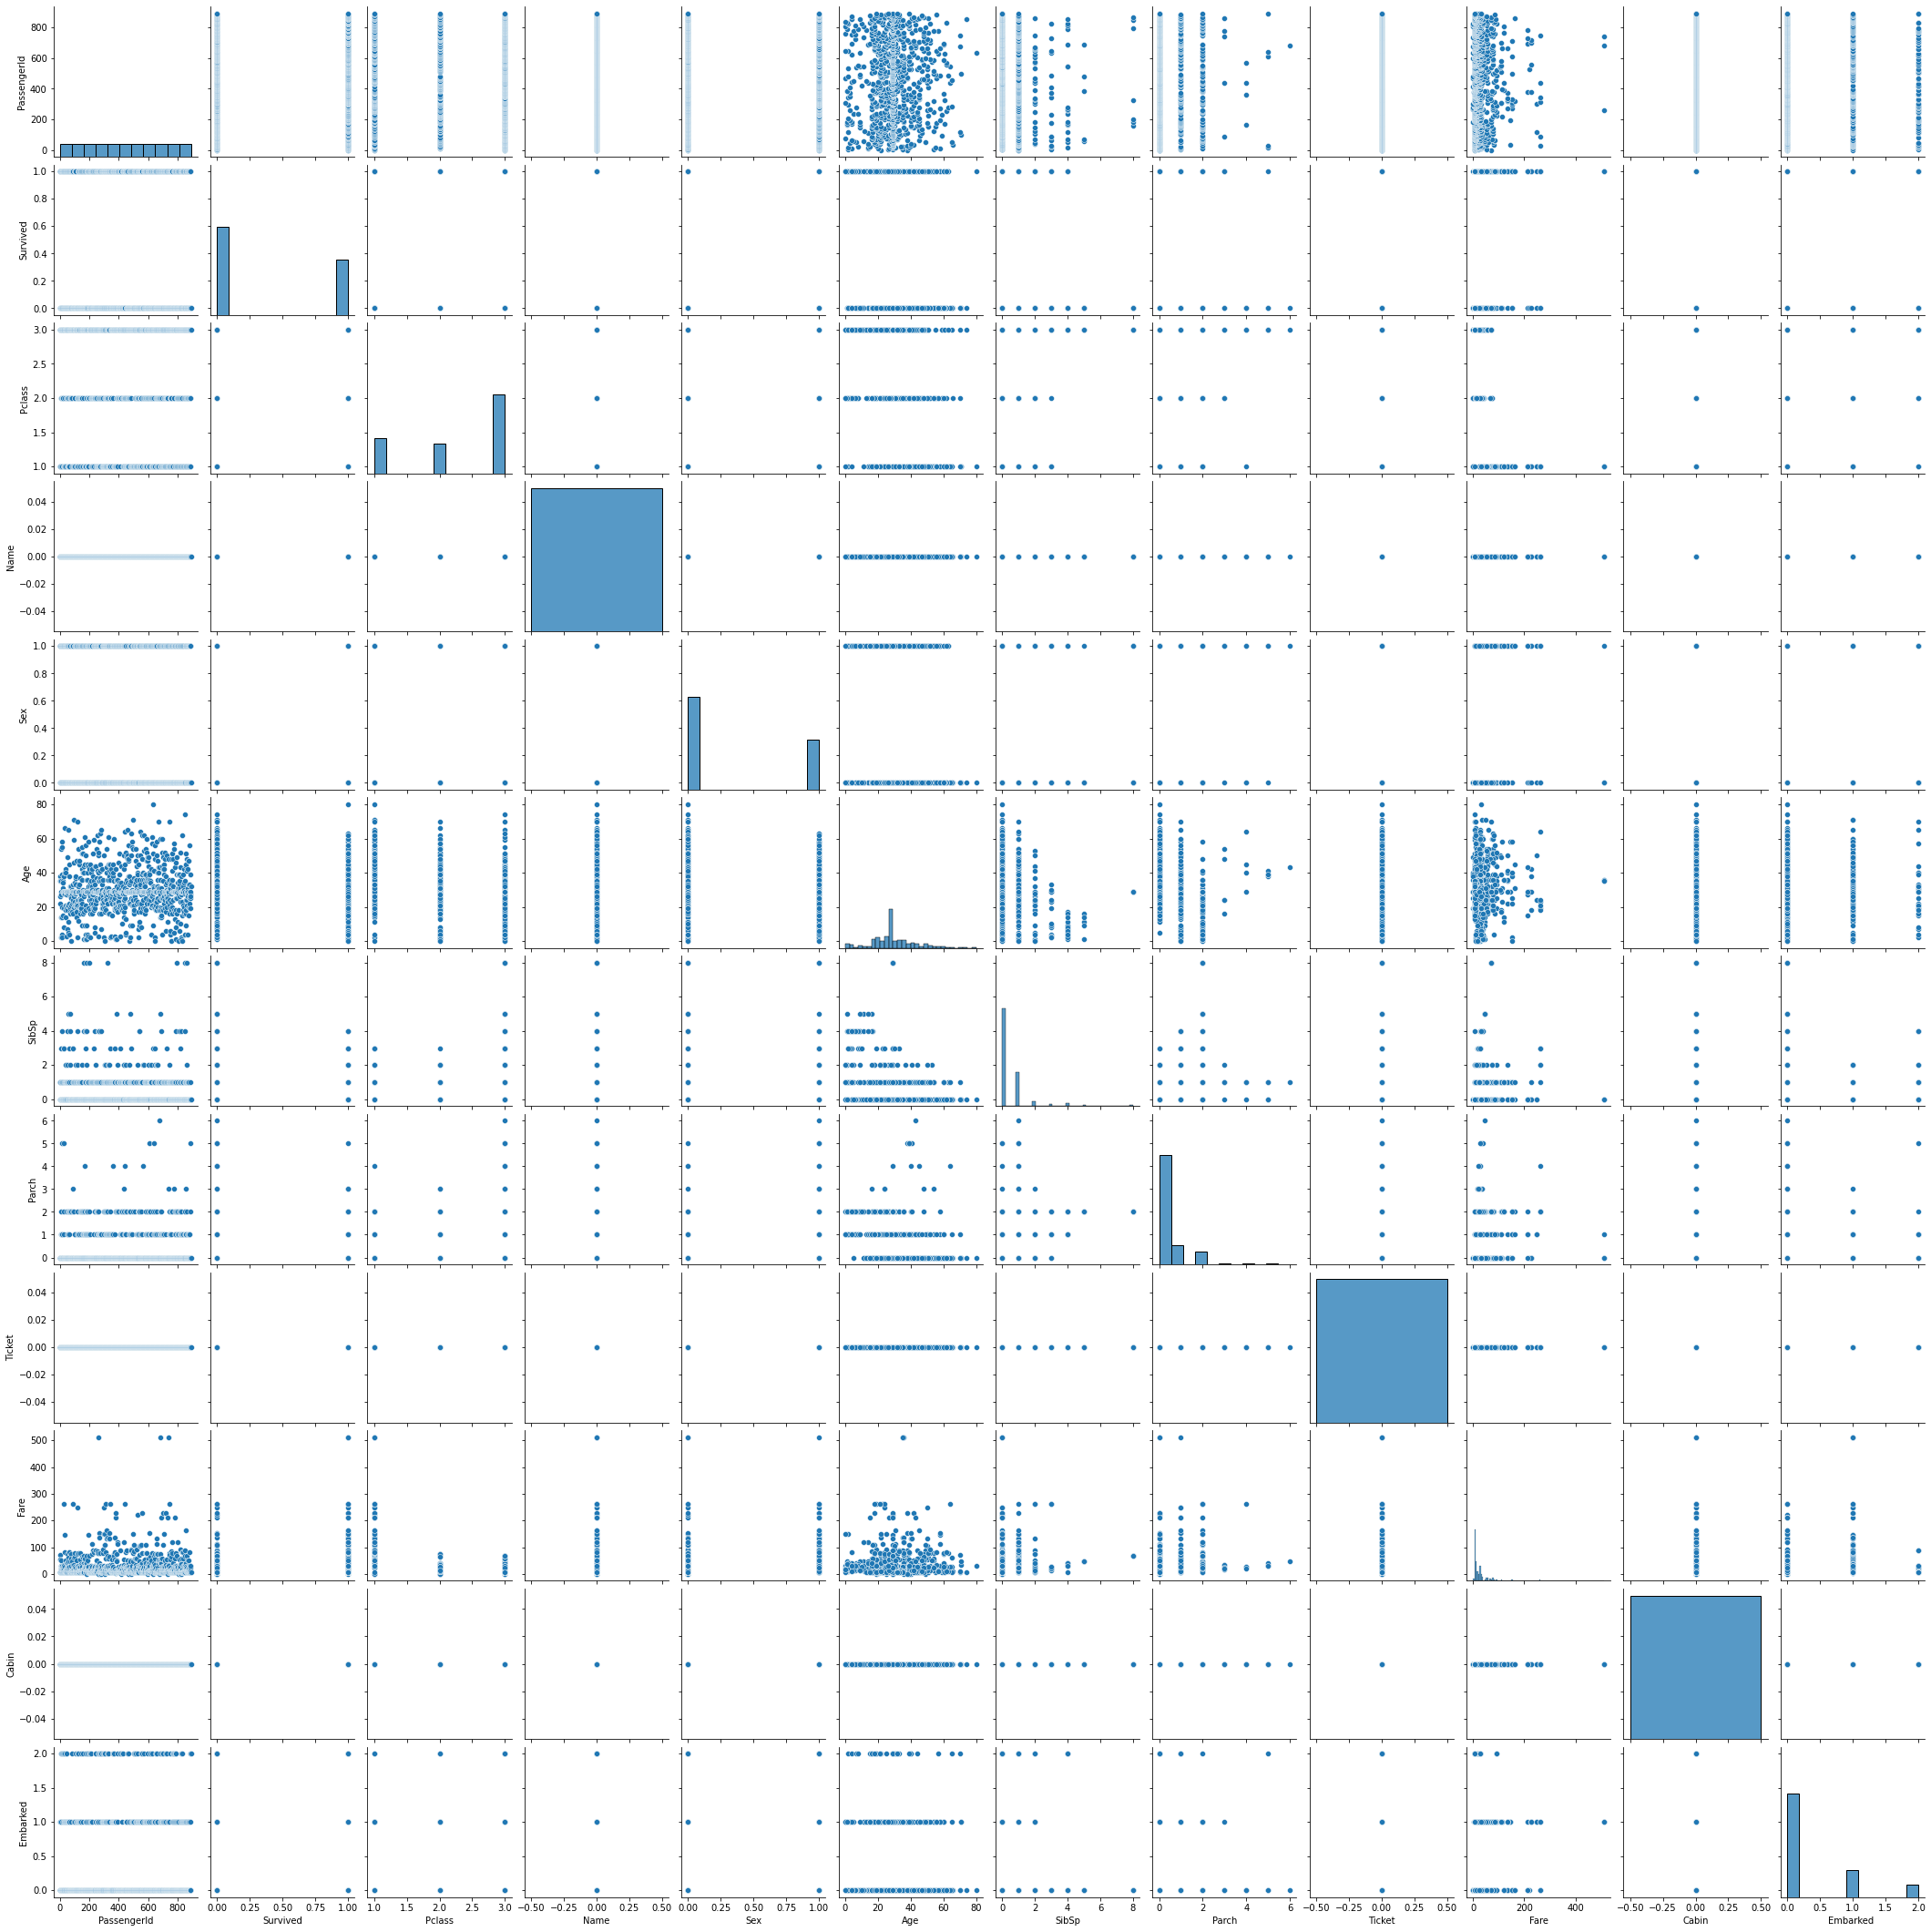

In [24]:
sns.pairplot(data)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

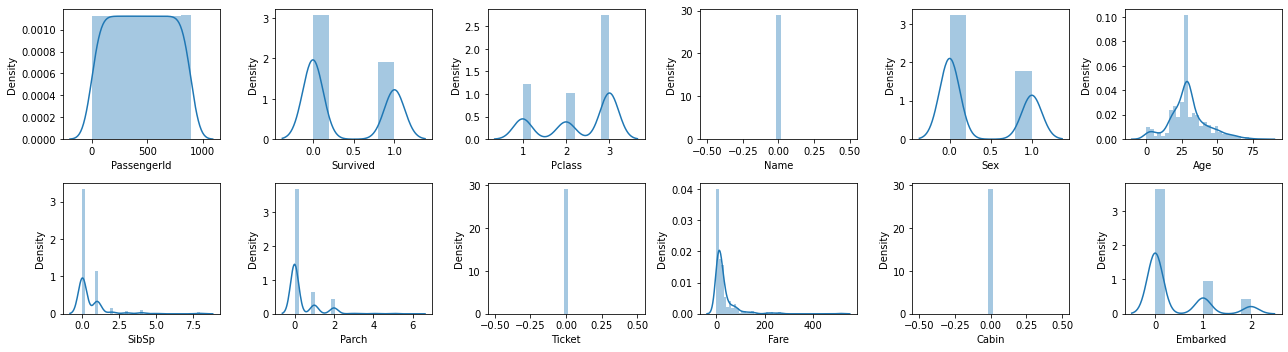

In [25]:
rows = 2
cols = 6

fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(18,5))

col = data.columns
index = 0

for i in range(rows):
  for j in range(cols):
    sns.distplot(data[col[index]], ax=ax[i][j])
    index += 1

plt.tight_layout()

### Responder algunas preguntas

Promedio de Tarifa

In [26]:
data['Fare'].mean()

31.78563411896745

Cantidad de personas según Parch

In [27]:
data['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

Cantidad de personas según su edad

In [28]:
data['Age'].value_counts()

29    197
24     31
22     27
28     27
30     27
     ... 
66      1
53      1
80      1
12      1
74      1
Name: Age, Length: 71, dtype: int64

### Construir el modelo de Regresión Logística

In [29]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [30]:
X = data.drop('Fare', axis=1)
y = data.Parch

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.20)

In [31]:
x_train.shape

(712, 11)

In [32]:
logistic_regression = LogisticRegression()

In [33]:
logistic_regression.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [77]:
accuracy = metrics.accuracy_score(y_test, y_prediction)
print('Exactitud= ' + str(100*accuracy) + "%")

ValueError: ignored

In [78]:
y_prediction = logistic_regression.predict(x_test)
print(y_prediction)

ValueError: ignored

In [79]:
logistic_regression.score(x_test, y_test)

ValueError: ignored

### Predicciones Manuales

Predecir la respuesta de las siguientes personas con las caracteristicas:

||Edad|Trabajo|Estado Civil|Educacion|Total hijos|Credito_sin_pago|Prestamo vivienda|Prestamo personal|Valor prestamo|Dias ultimo pago|Tarjetas credito|Contacto|Mes|Día semana|Duración último contacto|Días último contacto|Anterior contacto|numero_empleados|
|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|
|persona-1|20|unemployed|single|tecnical school|0|yes|no|yes|2000|3|0|1|april|monday|280 sg|15|2|0|

In [1]:
personas = np.array([[41,8,1,3,0,0,0,1,100,3,0,1,4,2,280,15,2,100]])
x_new = pd.DataFrame(personas, columns=['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex',
       'Age', 'SibSp', 'Parch','Ticket', 'Fare', 'Cabin', 'Embark '])
y_prediction = logistic_regression.predict(x_new)
print(y_prediction)

NameError: ignored

### Recursive Feature Elimination (RFE) - Eliminación de características recursivas (RFE)

---
https://towardsdatascience.com/dont-sweat-the-solver-stuff-aea7cddc3451


In [66]:
from sklearn.feature_selection import RFE

In [67]:
model = LogisticRegression(solver='lbfgs', max_iter=100000)
rfe = RFE(model, 3, verbose=1)
rfe = rfe.fit(X, y)

TypeError: ignored

In [68]:
rfe.support_

NameError: ignored

In [69]:
X.head(1)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.25,B96 B98,S


In [70]:
XX = X[X.columns[rfe.support_]]
XX.head(1)

NameError: ignored

In [71]:
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size=0.2, random_state=8, stratify=y)

NameError: ignored

In [72]:
X_train.shape

NameError: ignored

In [73]:
model = LogisticRegression(solver='lbfgs', max_iter=4000)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

NameError: ignored

In [74]:
model.score(X_test, y_test)

NameError: ignored